## Unit 3.1 &ndash; Introduction to Machine Learning

Numerous, similar definitions exist for what Machine Learning is and what it does.

> Machine learning is the study of computer algorithms that can improve automatically through experience and by the use of data ... Machine learning algorithms build a model based on sample data, known as training data, in order to make predictions or decisions without being explicitly programmed to do so.
>
> &mdash; <cite>Wikipedia</cite>

> \[Machine Learning is\] the process by which a computer is able to improve its own performance (as in analyzing image files) by continuously incorporating new data into an existing statistical model.
>
> &mdash; <cite>Merriam-Webster</cite>

Common among these two definitions are a number of features. Machine learning algorithms ...

* require training data to inform a statistical model.
* improve their model and thus their performance as they get more data.
* require no explicit programming.

In this unit, we are building upon the first look into the `sklearn` module in unit 2.3 which introduced some  machine learning algorithms. 
To dig into the important concepts in machine learning, we are going to emply simple and multiple linear regression since we are familiar with them. 
Many of our insights will directly translate into more complex models.

### Table of Contents

* [Overview of Machine Learning Techniques](#Overview)
* [Review: Linear Regression](#Linear)
* [In-Sample vs. Out-of-Sample Error](#OOS)
* [Bias, Variance and Model Complexity](#Bias)
* [Linear Regression with Constraints](#Constraints)
* [Cross-Validation Methods](#Cross)


### Overview of Machine Learning Techniques <a name="Overview"></a>

Broadly speaking, we can differentiate between three types of machine learning algorithms: supervised learning, unsupervised learning and reinforcement learning. 
These different types of machine learning refer to differences in the scope and goals of our algorithms.

#### Supervised Learning

In supervised learning, we have data that possesses both inputs (features or attributes) and outputs (targets), i.e., we know the values of dependent and independent variables in our sample. We then use this data to understand in what way the features combine best to explain or predict the target value, hoping to be able to generalize beyond the sample.

A simple example of a supervised learning algorithm is multiple linear regressions. 
Given a data set with the input $X = (X_1, X_2, \dots, X_N)$ and an output $Y$, we build a model

$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_N X_N + \epsilon,$$

where $\epsilon$ is an error term that captures all information that cannot be captured without input $X$.

We want to find coefficients $\hat{\beta} = (\hat{\beta}_0, \hat{\beta}_1, \hat{\beta}_2,\dots, \hat{\beta}_N)$ to make predictions $\hat{Y}$:

$$\hat{Y} = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \hat{\beta}_2 X_2 + \dots + \hat{\beta}_N X_N.$$

If we have $N$ features in our input, we need to estimate $N+1$ coefficients; the "intercept" and the "slope" parameters.
Under the hood, the linear regression computes the parameters $\hat{\beta}$ such that the predictions $\hat{Y}$ are *close* to the actual output $Y$ by some measure.
This makes the algorithm supervised; we compare the predictions to a known output to evaluate its performance.

Consider an example from finance.
Say we are the owner of a portfolio made up of a large number of different stocks. 
The field of asset pricing teaches us that in holding these investments, we are rewarded for the risks that we are taking, e.g., market risk or size risk (big firms tend to be less risky than small firms) or value risk (growth firms tend to be less risky than value firms). 
In supervised learning, we would use the returns of portfolios reflecting the three sources of risk (the input) and compare it to our portfolio's returns (the output). 
We would then learn about the effective composition of our portfolio in these sources of risk.
Building such a model, we are exploring the relationships of our portfolio to other portfolios, using the output to infer these relationships. 

More generally, we can a supervised model as 

$$Y = f(X) + \epsilon,$$

where $f(X) = \mathrm{E}[Y|X=x]$ is a function to describe the dependence of $Y$ on the observed value of $X$; effectively, we are wondering about the probability that we measure $Y$ when we observe $X$, also written as $P(Y|X)$, i.e., the probability of $Y$ given / conditioned on $X$. 
As we study more data, our guesses for these conditional probabilities get better and better.
Per notation, thus, $\hat{f}(X)$ are the predictions according to the inferred probabilities.

Importantly, in more elaborate supervised learning models, the functional form of $f$ is learned, too.
In linear regression, we are effectively imposing constraints on the structure of $f$; in neural networks, more complex relationships are allowed, and the function $f$ is more complicated &ndash; but (hopefully) able to describe the data better.


#### Unsupervised Learning

In unsupervised learning, our goal is a different one. 
We have data with features (inputs) but no target values (outputs). 
Instead of exploring relationships between inputs and outputs like in supervised learning, we thus attempt to explore the structure of the data in more detail! 

One very useful application is dimensionality reduction. 
Say you have gathered a large number of financial indicators to inform your positioning in the market. 
Some information may be redundant. One example would involve US Treasury bond yields and US corporate bond yields.  The latter is effectively the US Treasury bond yields plus a credit spread that investors demand buying these more risky securities. Therefore, various combinations of US Treasury bond yields and US corporate bond yields is more informative than the two data points independently!
When faced with so many indicators, we ought to extract the essence of the information and figure out which indicators and their combinations matter.

Another common application is clustering, also known as data segmentation.
This method attempts to group observations by similarity or dissimilarity.
Following up on our market indicator example, we may want to explore the state of the market itself using a number of observables.
Naturally, no two days in markets are alike; but while history does not repeat itself, it often rhymes. 
Therefore, being able to identify in which regime financial markets are, e.g., crisis, low volatility or goldilocks, may prove very helpful.

In both of these two examples, we do not presume a correct way to reduce the dimensionality or group the data.
Instead, we provide some boundary conditions or parameters.
In the case of dimensionality reduction, we may specify the number of dimensions or the minimum information content retained. In the case of data segmentation, we may specify the number of groups into which separate the data.


#### Reinforcement Learning

While beyond the scope of this self-paced lab, reinforcement learning deserves a mention. 
In a reinforcement learning algorithm, we train a so-called *agent* in an environment.
The agent may take different actions that lead to results which are evaluated and assigned a reward or a penalty. Incorporating the rewards and penalties, the agent learns an optimal policy for its environment. 
One finance example would be a trading execution algorithm. 
Given a large portfolio which needs to be dynamically adjusted by buying and selling securities, the trader may be concerned with their market impact, i.e., affecting prices in an adverse way by showing their hand, and at the same time be worried about not acting quickly enough.
An algorithm based on reinforcement learning may be able to identify a policy to trade in the most effective way: minimizing both the time until the trade is fully executed and the adverse price impact.

### Review: Linear Regression <a name="Linear"></a>

To review linear regression and introduce linear regression with constraints, consider the following data set, created randomly as 

$$Y = 2\,\mathrm{sin}(3X) + 3X^2 + \epsilon.$$

Here, $f(X) = 2\,\mathrm{sin}(3X) + 3X^2$ is the function to generate the "true" data and $\epsilon$ is a normally distributed noise term with zero mean and unit variance $(\mu_\epsilon=0, \sigma_\epsilon^2 = 1$)

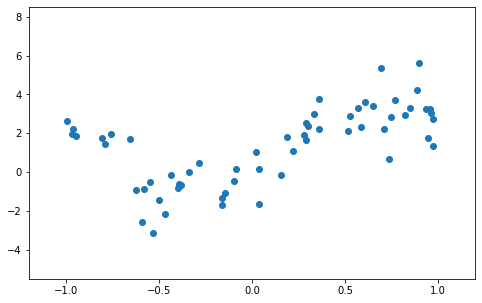

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(200)

def f(x):
    return 2*np.sin(3*x) + 3*x**2

X = np.array(np.random.uniform(-1, 1, 60))
Y = np.array([f(x) + np.random.normal(0, 1) for x in X])

fig, ax = plt.subplots(figsize=(8, 5))

ax.scatter(x=X, y=Y)
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-5.5, 8.5);

This function is not a straight-up polynomial because it has the sine function in it.
Let us use the `sklearn` linear models functionality to see how well we can approximate the function with a polynomial &ndash; the simplest of which is $f(X) = \beta_0 + \beta_1 X.$

To satisfy the input that the `fit()` function expects, we reshape `X` into an explicit $N\times 1$ array.

In [2]:
from sklearn import linear_model

reg_X = X.reshape(-1, 1)
reg_y = Y

mod = linear_model.LinearRegression()
res = mod.fit(reg_X, reg_y)

# Format the output to have 4 decimals; 
# :.4f indicates a floating number (f) with 4 decimals (.4)
print("beta_0: {:.4f}".format(res.intercept_))
print("beta_1: {:.4f}".format(res.coef_[0]))

beta_0: 1.1774
beta_1: 1.8821


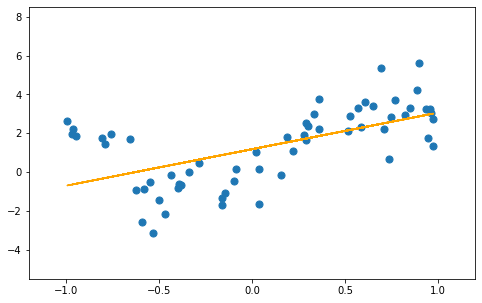

In [3]:
np.random.seed(200)

X = np.array(np.random.uniform(-1, 1, 60))
Y = np.array([f(x) + np.random.normal(0, 1) for x in X])

fig, ax = plt.subplots(figsize=(8, 5))

ax.scatter(x=X, y=Y, s=50)
ax.plot(X, res.intercept_ + res.coef_[0]*X, color="orange")
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-5.5, 8.5);

The line somewhat explains the behavior of the data, but not very well.
The moderate quality of fit is reflected by the $R^2$ measure:

In [4]:
print("R-squared: {:.4f}".format(res.score(reg_X, reg_y)))

R-squared: 0.3468


$R^2$ measures the fraction of total variance in $Y$ that can be attributed to the variance explained by $Y$'s co-movement with $X$. Accordingly, $1-R^2$ is the fraction of total variance that can be attributed to the error term $\epsilon$.

Naturally, our simple linear fit is not going to cut it because the data comes from a more complicated function $f(x)$.

To work this out with our data, consider the following models to fit to our graph:

* $p=1$: $f(x) = \beta_0 + \beta_1 x$.
* $p=2$: $f(x) = \beta_0 + \beta_1 x + \beta_2 x^2$.
* $p=3$: $f(x) = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3$.
* ...
* $p=12$: $f(x) = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \dots + \beta_12 x^12$.

More generally, we can write 

$$f_p(x) = \beta_0 + \sum_{k=1}^p \beta_k x^k = \sum_{k=0}^p \beta_k x^k,$$

since $x^0 = 1$.

Oftentimes, the final expression is employed to simplify notation.
Instead of defining $X = (X_1, X_2, \dots, X_N)$, machine learning practitioners will define $X = (1, X_1, X_2, \dots, X_N)$ and $\beta = (\beta_0, \beta_1, \beta_2,\dots, \beta_N)$.

In our polynomial case, this notation would be $X = (1, X, X^2, \dots, X^p)$ and $\beta = (\beta_0, \beta_1, \beta_2,\dots, \beta_p)$.

This notation ties in well with the convention of creating polynomials in Python.
Above, we have manually created the terms for `X**2`, but it makes sense to use a more streamlined solution and employ our powerful libraries, especially if we need `X**3`, through `X**12` for many different data sets.
In Python, we can use the submodule `preprocessing` in the `sklearn` package; `preprocessing` contains a toolbox to transform our data into its polynomial representations:

In [5]:
from sklearn.preprocessing import PolynomialFeatures

def transform_x(x, order):
    if len(x.shape) == 1:
        x = x.reshape(-1, 1)
    poly = PolynomialFeatures(order)
    return poly.fit_transform(x)


print("Original data:")
print(X[0:5])
print("Transformed data:")
print(transform_x(X, 2)[0:5])
print(X[0:5])

Original data:
[ 0.89526451 -0.54690516  0.18884029 -0.14338263  0.52828137]
Transformed data:
[[ 1.          0.89526451  0.80149855]
 [ 1.         -0.54690516  0.29910525]
 [ 1.          0.18884029  0.03566065]
 [ 1.         -0.14338263  0.02055858]
 [ 1.          0.52828137  0.27908121]]
[ 0.89526451 -0.54690516  0.18884029 -0.14338263  0.52828137]


Note how the first element (index 0) in each row of the transformed data is simply $x^0 = 1$, the second element (index 1) is $x$, and the third element (index 2) is $x^2$.

We can repeat our linear regression from above with a minor modification; since our transformed data includes $x^0=1$, we are effectively already fitting an intercept, and we therefore need to specify not to fit an intercept separately.

In [6]:
mod = linear_model.LinearRegression(fit_intercept=False)
res = mod.fit(transform_x(X, 1), reg_y)

print("beta_0: {:.4f}".format(res.coef_[0]))
print("beta_1: {:.4f}".format(res.coef_[1]))

beta_0: 1.1774
beta_1: 1.8821


The results are the same! 

Now that we have streamlined the estimation of polynomials, let us estimate the models.

In [7]:
models = {}
max_order = 12

for order in range(1, max_order+1):
    reg_X, reg_y = transform_x(X, order=order), Y
    mod = linear_model.LinearRegression(fit_intercept=False)
    models[order] = {"res": mod.fit(reg_X, reg_y), 
                     "prediction": mod.predict(reg_X)}

We can plot our fits:

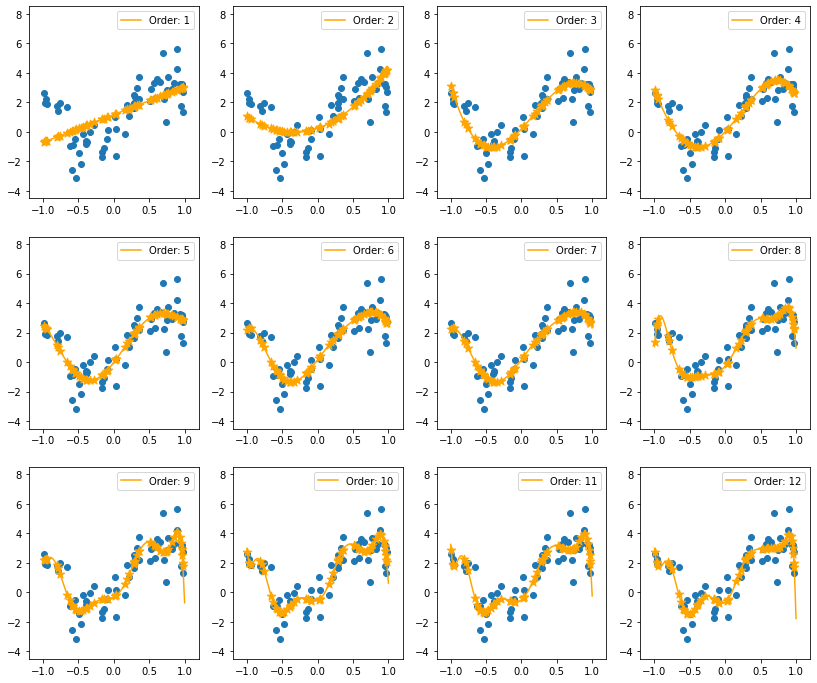

In [8]:
fig, axes = plt.subplots(3, int(max_order/3), figsize=(14, 12))

for order, ax in zip(range(1, max_order+1), axes.reshape(-1)):
    ax.scatter(x=X, y=Y)
    ax.scatter(x=X, y=models[order]["prediction"], marker="*", s=80, color="orange")
    ax.plot(np.linspace(-1, 1, 100), 
            np.dot(transform_x(np.linspace(-1, 1, 100), order), models[order]["res"].coef_),
            color="orange", label="Order: " + str(order))
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-4.5, 8.5)
    ax.legend()

When we look at the plots, we observe that the curve more closely matches the data with each added term in the polynomial &ndash; that is not surprising, but the question is whether more terms make a better model.
To answer this question, we need to discuss the difference between in-sample and out-of-sample errors.

### In-Sample vs. Out-of-Sample Error <a name="OOS"></a>

In our analysis, we have used 60 data points as our *training data* from which the regression learns its best estimate for the coefficients. 
When we plot the curves in our graphs above, each star \* marks a prediction $\hat{Y}_i$ for the corresponding value of $X_i$. 
The difference between the prediction and the actual value is the in-sample error we are making with our predictions, $\hat{Y}_i - Y_i$.
This difference term is also called the residual, $\hat{\epsilon}_i$.

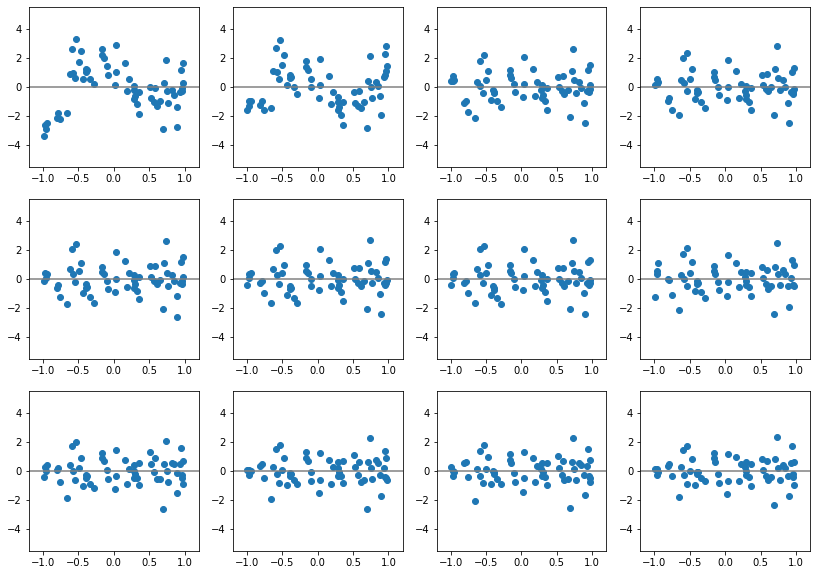

In [9]:
fig, axes = plt.subplots(3, int(max_order/3), figsize=(14, 10))

for order, ax in zip(range(1, max_order+1), axes.reshape(-1)):
    ax.scatter(x=X, y=models[order]["prediction"] - Y)
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-5.5, 5.5)
    ax.hlines(0, -1.2, 1.2, color="gray")

On average, in linear regressions, this error is zero by design. 
The squared deviation becomes less and less though as we increase the order of the polynomial,  reflecting the fact that our fitted curve hugs the data points ever more closely:

In [10]:
for order in range(1, 13):
    print("Order {} \t In-Sample Error: {:.2f}".format(order, np.mean((models[order]["prediction"] - Y)**2)))

Order 1 	 In-Sample Error: 2.51
Order 2 	 In-Sample Error: 1.90
Order 3 	 In-Sample Error: 1.07
Order 4 	 In-Sample Error: 1.05
Order 5 	 In-Sample Error: 1.02
Order 6 	 In-Sample Error: 1.00
Order 7 	 In-Sample Error: 1.00
Order 8 	 In-Sample Error: 0.90
Order 9 	 In-Sample Error: 0.82
Order 10 	 In-Sample Error: 0.79
Order 11 	 In-Sample Error: 0.78
Order 12 	 In-Sample Error: 0.76


Our first intuition could be to select a model with a larger order in the polynomial, for it has a good fit and a low in-sample error.
However, we also make a troubling observation when we look at the graphs for the last polynomials though:

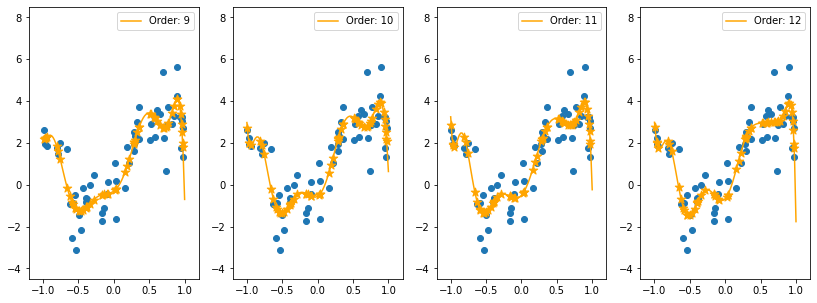

In [11]:
fig, axes = plt.subplots(1, int(max_order/3), figsize=(14, 5))

for order, ax in zip(range(max_order-3, max_order+1), axes.reshape(-1)):
    ax.scatter(x=X, y=Y)
    ax.scatter(x=X, y=models[order]["prediction"], marker="*", s=80, color="orange")
    ax.plot(np.linspace(-1, 1, 100), 
            np.dot(transform_x(np.linspace(-1, 1, 100), order), models[order]["res"].coef_),
            color="orange", label="Order: " + str(order))
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-4.5, 8.5)
    ax.legend()

At the very tails of our range, the behavior of the best fitted curve becomes volatile. 
On the left end at $x=-1$, the polynomials of order 8 trends downwards, while they trend upwards for polynomials of higher order. 
On the right end at $x=+1$, the polynomials indicate a very steep drop.

Let's assume we collected some more data, and this time around we have a wider purview and extend the range for $x$ by 10% on either side to $[-1.1, 1.1]$.
This data is referred to as *test data* since we use it to evaluate the performance of our model on data we have not used to train it.

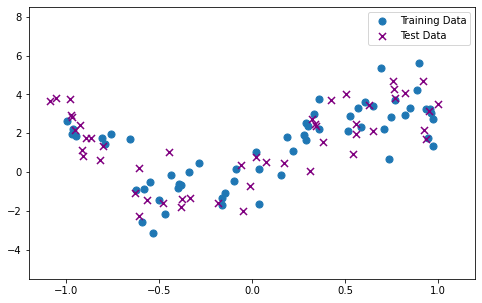

In [12]:
X_test = np.array(np.random.uniform(-1.1, 1.1, 50))
Y_test = np.array([f(x) + np.random.normal(0, 1) for x in X_test])

fig, ax = plt.subplots(figsize=(8, 5))

ax.scatter(x=X, y=Y, s=50, label="Training Data")
ax.scatter(x=X_test, y=Y_test, s=50, color="purple", marker="x", label="Test Data")
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-5.5, 8.5)
ax.legend();

The data naturally blends into our training data.
Now let us plot the fitted curves only against the test data.

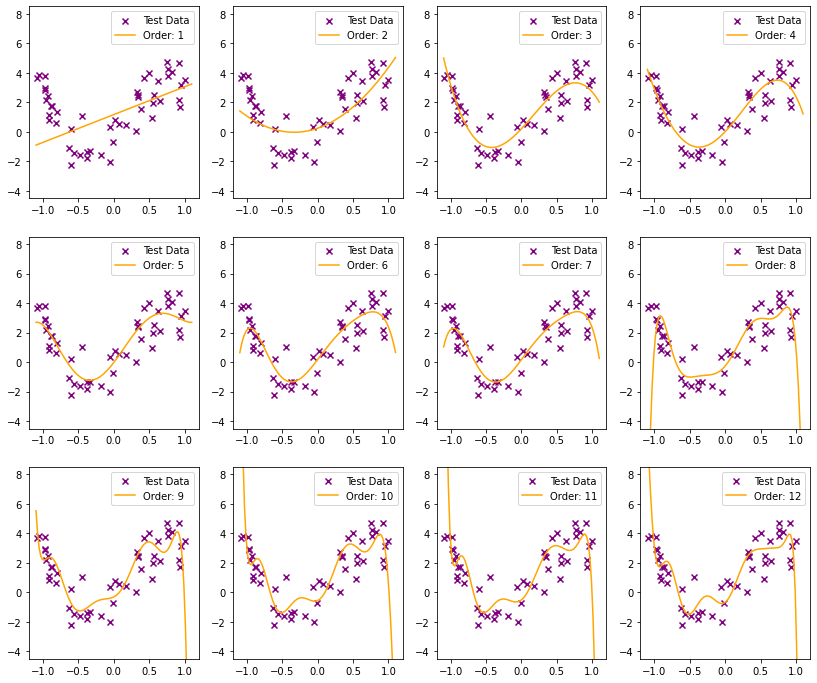

In [13]:
fig, axes = plt.subplots(3, int(max_order/3), figsize=(14, 12))

for order, ax in zip(range(1, max_order+1), axes.reshape(-1)):
    ax.scatter(x=X_test, y=Y_test, marker="x", color="purple", label="Test Data")
    ax.plot(np.linspace(-1.1, 1.1, 100), 
            np.dot(transform_x(np.linspace(-1.1, 1.1, 100), order), models[order]["res"].coef_),
            color="orange", label="Order: " + str(order))
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-4.5, 8.5)
    ax.legend()

We evaluate the squared deviation of our predictions from the actual data again:

In [14]:
for order in range(1, 13):
    Y_pred = np.dot(transform_x(X_test, order), models[order]["res"].coef_)
    print("Order {}: \t Out-of-Sample Error: {:.2f}".format(order, np.mean((Y_pred - Y_test)**2)))

Order 1: 	 Out-of-Sample Error: 3.96
Order 2: 	 Out-of-Sample Error: 2.00
Order 3: 	 Out-of-Sample Error: 0.89
Order 4: 	 Out-of-Sample Error: 0.88
Order 5: 	 Out-of-Sample Error: 0.97
Order 6: 	 Out-of-Sample Error: 1.21
Order 7: 	 Out-of-Sample Error: 1.15
Order 8: 	 Out-of-Sample Error: 6.37
Order 9: 	 Out-of-Sample Error: 1.51
Order 10: 	 Out-of-Sample Error: 6.07
Order 11: 	 Out-of-Sample Error: 13.45
Order 12: 	 Out-of-Sample Error: 2.58


These results paint a very different picture than previously! 
While the in-sample error decreases with the number of terms, the out-of-sample error first decreases and then drastically increases.
For a very low order $p$ of the polynomial, we are *underfitting*; we are not giving the model enough free parameters to capture the richness of the data. 
For a larger order $p$, we are *overfitting*; we are giving the model too much freedom to match the data it has seen, and as a result, our estimate does not generalize well to new and unknown data!

### Bias, Variance and Model Complexity <a name="Bias"></a>

When building a supervised learning model, we are concerned about our ability to generalize its predictive power.
If a model describes well the data we use to train it but fails to make good predictions about test data, it is not a particularly useful model. 

The bias-variance trade-off is a key concept to understand in order to be able to design a model that we can generalize! 
Let's explore this trade-off with our linear regression example.
To this end, we are going to look at the expected squared-error loss for an input $X = x_0$, which is simply the squared difference between the observed values for $Y$ and the predictions $\hat{Y} = \hat{f}(x_0)$:

$$
\begin{align}
\mathrm{Err}(x_0) &= \,\mathrm{E}\left[Y-\hat{Y} \,\vert\, X=x_0\right] \\
&= \,\sigma^2_\epsilon + \left(\mathrm{E}\left[\hat{f}(x_0)\right] - f(x_0)\right)^2 + \mathrm{E}\left[\hat{f}(x_0) - \mathrm{E}\left[\hat{f}(x_0)\right]\right)^2 \\
&= \,\mathrm{Irreducible\,Error} + \mathrm{Bias}^2 + \mathrm{Variance}.
\end{align} 
$$

In other words, the error we are making comprises of three parts.

* First, we have the irreducible error. Naturally, we most likely cannot explain everything about the output variable with a limited number of input variables, even if we were to build the most accurate model.
* Second, we have the bias term. It is a measure of how strongly our estimated mean differs from the true mean. This term is impacted by our model complexity; the more complexity we introduce, the more elaborately we build our model, the closer we get to accurately capturing the mean. 
* Third, we have the variance term. It is a measure of how large the squared differences are, and it captures the extent of the individual errors per observation. This term is also impacted by our model complexity; the more complexity we introduce, the more variance we induce.

Writing the error in this way lays bare the trade-off. 
If we make our model more complex, we reduce the bias term but increase the variance term.
If we make our model less complex and thus more flexible for new data, we reduce the variance term but increase the bias term. 

One way to addres this issue is to expand upon our linear regression framework and introduce constraints.

### Linear Regression with Constraints <a name="Constraints"></a>

If we look back at our regressions for the different polynomials, we should inspect the coefficients!
Naturally, high powers have a huge impact, and oftentimes, regressions try to "tame" them by assigning large weights that fit the training data.

In [15]:
import pandas as pd

coefficients_df = pd.DataFrame(data=None, 
                               columns=["beta_{}".format(i) for i in range(max_order+1)])

for order in range(1, 13):
    coefficients_df.loc["p_{}".format(order), 
                        ["beta_{}".format(i) for i in range(order+1)]] = models[order]["res"].coef_
    
coefficients_df.T

,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,p_11,p_12
beta_0,1.17744,0.252512,0.215377,0.02188,-0.013822,0.173746,0.17178,-0.254754,-0.303961,-0.550931,-0.50511,-0.667493
beta_1,1.882098,1.644051,5.109476,5.108111,6.270657,6.283884,6.429103,5.7677,2.484294,2.178948,3.8368,3.716037
beta_2,NaN,2.46287,2.725456,4.403567,4.70495,1.113844,1.12149,15.217509,16.597383,28.932939,27.417545,40.124143
beta_3,NaN,NaN,-5.346531,-5.352279,-10.594362,-10.879836,-12.185532,-6.255036,41.719908,43.177779,9.949732,7.667255
beta_4,NaN,NaN,NaN,-1.789679,-2.038208,8.552612,8.527249,-68.17272,-71.754337,-177.15638,-166.386777,-328.00467
beta_5,NaN,NaN,NaN,NaN,4.472098,4.705846,7.60057,-4.960637,-192.957442,-194.801605,-4.092134,19.034124
beta_6,NaN,NaN,NaN,NaN,NaN,-7.558072,-7.548242,125.830944,128.579456,444.774484,413.08651,1151.522596
beta_7,NaN,NaN,NaN,NaN,NaN,NaN,-1.78818,5.403464,276.112199,275.514036,-174.236056,-249.524998
beta_8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-71.613194,-72.371119,-457.888891,-417.292059,-1922.910258
beta_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-128.809576,-127.240519,337.491542,437.788724


The coefficients for the higher powers for the more complex models are huge!
Since, for example $0.8^1$ is not very different than $0.85^1$, we do not need a large coefficient.
However, $0.8^12 = 0.069$ and $0.85^12 = 0.142$, which is more than twice as big. 
Therefore, we need large coefficients to "bend" the curve into the right shape &ndash; with the result that our out-of-sample error becomes huge due to our overfitting.

In many applications, it makes sense to impose restrictions on the coefficients.
Our example is certainly exaggerated, but it serves us well to demonstrate the impact of overfitting and how constrained models like *Ridge Regression* or *LASSO Regression*

#### Ridge Regression

In ordinary least squares regression, we find the coefficients in our estimate by solving

$$\hat{\beta} = \mathrm{argmin}_\beta \left(\lvert X\beta - Y\rvert^2\right),$$

that is, identifying the values $\hat{\beta} = (\hat{\beta}_0,\dots,\hat{\beta}_p)$ that minimize the squared difference between our estimate and the actual data.

In ridge regression, we add a *regularizer* that penalizes large values for the individual estimates of our coefficients:

$$\hat{\beta} = \mathrm{argmin}_\beta \left(\lvert X\beta - Y\rvert^2 + \alpha \lvert\beta\rvert^2\right),$$

where $\lvert\beta\rvert^2 = \beta_0^2 + \dots + \beta_p^2$.
If the individual values of $\beta$ need to be made very large to minimize the error in our predictions, we are not happy with this solution.
Instead, we try to find a solution in which the values of $\beta$ are reasonably small and the fit is reasonably good at the same time!

$\alpha$ is the regularization parameter

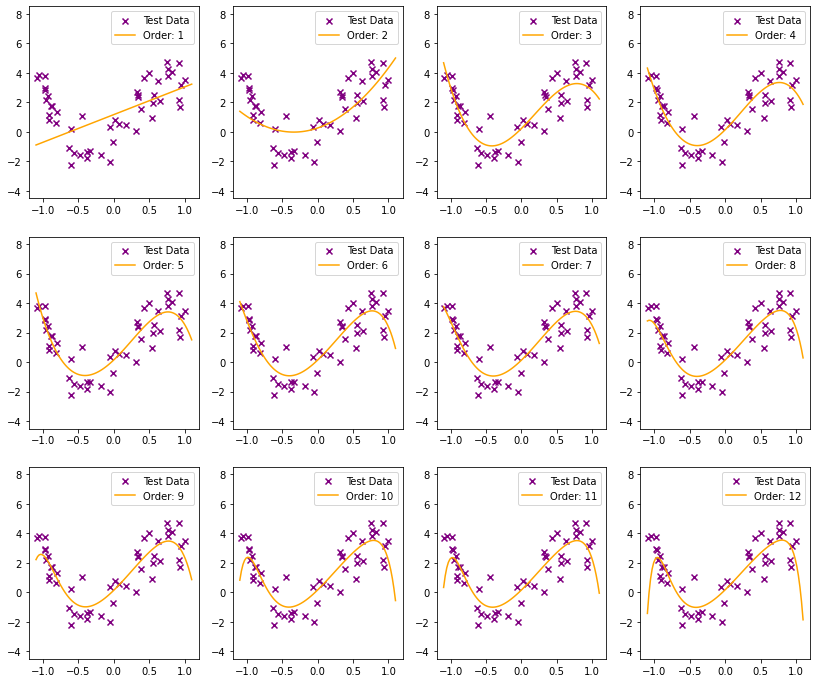

In [16]:
ridge_models = {}
max_order = 12

for order in range(1, max_order+1):
    reg_X, reg_y = transform_x(X, order=order), Y
    mod = linear_model.Ridge(alpha=0.1, fit_intercept=False)
    ridge_models[order] = {"res": mod.fit(reg_X, reg_y), 
                           "prediction": mod.predict(reg_X)}


fig, axes = plt.subplots(3, int(max_order/3), figsize=(14, 12))


for order, ax in zip(range(1, max_order+1), axes.reshape(-1)):
    
    ax.scatter(x=X_test, y=Y_test, marker="x", color="purple", label="Test Data")
    ax.plot(np.linspace(-1.1, 1.1, 100), 
            np.dot(transform_x(np.linspace(-1.1, 1.1, 100), order), 
                   ridge_models[order]["res"].coef_),
            color="orange", label="Order: " + str(order))
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-4.5, 8.5)
    ax.legend()

The fits look significantly more "tame" and probably lend themselves to better generalization. 
We can check the in-sample and out-of-sample errors:

In [17]:
for order in range(1, 13):
    Y_IS_pred = ridge_models[order]["prediction"]
    Y_OSS_pred = np.dot(transform_x(X_test, order), ridge_models[order]["res"].coef_)
    
    print("Order {}:\t In-Sample Error: {:.2f} ... Out-of-Sample Error: {:.2f}"
          .format(order, np.mean((Y_IS_pred - Y)**2), np.mean((Y_OSS_pred - Y_test)**2)))

Order 1:	 In-Sample Error: 2.51 ... Out-of-Sample Error: 3.96
Order 2:	 In-Sample Error: 1.90 ... Out-of-Sample Error: 2.01
Order 3:	 In-Sample Error: 1.08 ... Out-of-Sample Error: 0.89
Order 4:	 In-Sample Error: 1.06 ... Out-of-Sample Error: 0.89
Order 5:	 In-Sample Error: 1.07 ... Out-of-Sample Error: 0.89
Order 6:	 In-Sample Error: 1.06 ... Out-of-Sample Error: 0.89
Order 7:	 In-Sample Error: 1.06 ... Out-of-Sample Error: 0.89
Order 8:	 In-Sample Error: 1.04 ... Out-of-Sample Error: 0.93
Order 9:	 In-Sample Error: 1.04 ... Out-of-Sample Error: 0.96
Order 10:	 In-Sample Error: 1.03 ... Out-of-Sample Error: 1.11
Order 11:	 In-Sample Error: 1.03 ... Out-of-Sample Error: 1.17
Order 12:	 In-Sample Error: 1.02 ... Out-of-Sample Error: 1.48


While the in-sample error of the ridge regression is higher than for the ordinary least squares regression, the out-of-sample error is significantly less!
Since our goal is frequently to build a model that learns on training data to be ready for new test data, we are often happy to sacrifice some quality of the in-sample fitting to have a better out-of-sample error.

Lastly, let's check the coefficients.
They are much smaller in general, reducing the extreme variability.

In [18]:
ridge_coefficients_df = pd.DataFrame(data=None, 
                                     columns=["beta_{}".format(i) for i in range(max_order+1)])

for order in range(1, 13):
    ridge_coefficients_df.loc["p_{}".format(order), 
                              ["beta_{}".format(i) 
                               for i in range(order+1)]] = ridge_models[order]["res"].coef_
    
ridge_coefficients_df.T

,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,p_11,p_12
beta_0,1.176204,0.266202,0.233343,0.151181,0.15597,0.141842,0.139394,0.150528,0.148959,0.16587,0.165475,0.18004
beta_1,1.874271,1.640355,4.788604,4.787813,4.586649,4.586727,4.660322,4.659973,4.694972,4.69533,4.69911,4.700404
beta_2,NaN,2.427,2.667469,3.410143,3.36789,3.105595,3.127001,2.76037,2.774112,2.495846,2.49867,2.33142
beta_3,NaN,NaN,-4.878867,-4.879322,-3.838462,-3.891277,-3.984297,-4.029901,-3.944215,-3.973265,-3.892809,-3.907252
beta_4,NaN,NaN,NaN,-0.805809,-0.772184,0.804197,0.808108,1.414399,1.426509,1.573125,1.581511,1.535452
beta_5,NaN,NaN,NaN,NaN,-0.945734,-0.901804,-1.516687,-1.520551,-1.840512,-1.861283,-1.936201,-1.959835
beta_6,NaN,NaN,NaN,NaN,NaN,-1.444602,-1.462012,-0.032093,-0.032993,0.690486,0.695616,1.011927
beta_7,NaN,NaN,NaN,NaN,NaN,NaN,0.704106,0.736324,0.094492,0.095752,-0.128169,-0.140832
beta_8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.849171,-1.862453,-0.686801,-0.687998,-0.035145
beta_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.928169,0.951637,0.616532,0.620878


#### LASSO Regression

In a similar fashion, LASSO (least absolute shrinkage and selection operator) regression restricts the weights by solving

$$\hat{\beta} = \mathrm{argmin}_\beta \left(\lvert X\beta - Y\rvert^2 + \alpha \lvert\beta\rvert\right),$$

where $\lvert\beta\rvert = \lvert \beta_0 \rvert + \dots + \lvert\beta_p\rvert$. 
Instead of the sum of the squares we set the absolute values of the coefficients as penalties.
Generally, this regularization leads to more coefficients to be zero or very close to zero as opposed to just smaller.

We can run through the same steps again:

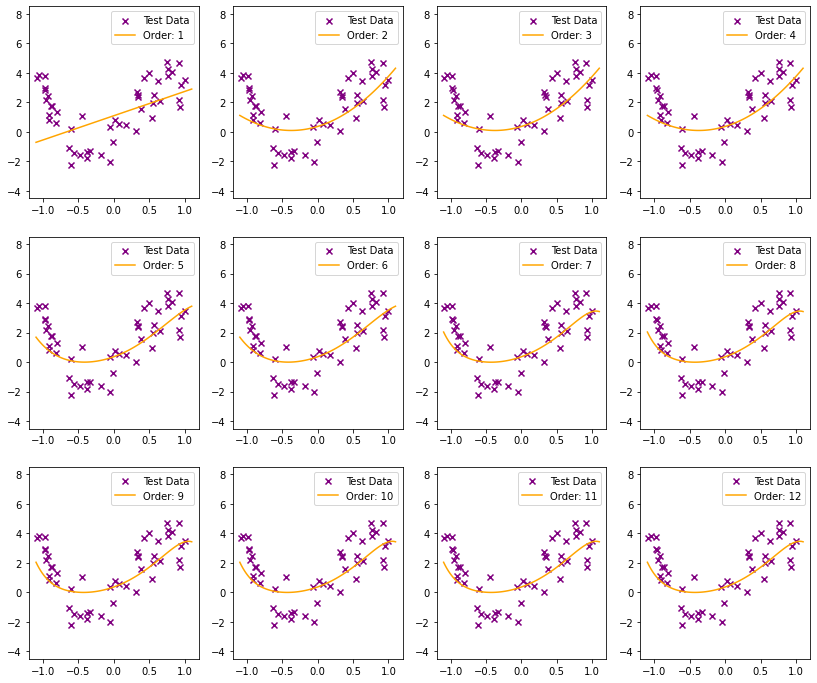

In [19]:
lasso_models = {}
max_order = 12

for order in range(1, max_order+1):
    reg_X, reg_y = transform_x(X, order=order), Y
    mod = linear_model.Lasso(alpha=0.1, fit_intercept=False)
    lasso_models[order] = {"res": mod.fit(reg_X, reg_y), 
                           "prediction": mod.predict(reg_X)}


fig, axes = plt.subplots(3, int(max_order/3), figsize=(14, 12))


for order, ax in zip(range(1, max_order+1), axes.reshape(-1)):
    
    ax.scatter(x=X_test, y=Y_test, marker="x", color="purple", label="Test Data")
    ax.plot(np.linspace(-1.1, 1.1, 100), 
            np.dot(transform_x(np.linspace(-1.1, 1.1, 100), order), 
                   lasso_models[order]["res"].coef_),
            color="orange", label="Order: " + str(order))
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-4.5, 8.5)
    ax.legend()

In [20]:
for order in range(1, 13):
    Y_IS_pred = lasso_models[order]["prediction"]
    Y_OSS_pred = np.dot(transform_x(X_test, order), lasso_models[order]["res"].coef_)
    
    print("Order {}:\t In-Sample Error: {:.2f} ... Out-of-Sample Error: {:.2f}"
          .format(order, np.mean((Y_IS_pred - Y)**2), np.mean((Y_OSS_pred - Y_test)**2)))

Order 1:	 In-Sample Error: 2.54 ... Out-of-Sample Error: 3.85
Order 2:	 In-Sample Error: 1.96 ... Out-of-Sample Error: 2.23
Order 3:	 In-Sample Error: 1.96 ... Out-of-Sample Error: 2.23
Order 4:	 In-Sample Error: 1.96 ... Out-of-Sample Error: 2.23
Order 5:	 In-Sample Error: 1.79 ... Out-of-Sample Error: 1.94
Order 6:	 In-Sample Error: 1.79 ... Out-of-Sample Error: 1.94
Order 7:	 In-Sample Error: 1.77 ... Out-of-Sample Error: 1.87
Order 8:	 In-Sample Error: 1.77 ... Out-of-Sample Error: 1.87
Order 9:	 In-Sample Error: 1.77 ... Out-of-Sample Error: 1.87
Order 10:	 In-Sample Error: 1.77 ... Out-of-Sample Error: 1.87
Order 11:	 In-Sample Error: 1.77 ... Out-of-Sample Error: 1.87
Order 12:	 In-Sample Error: 1.77 ... Out-of-Sample Error: 1.87


In [21]:
lasso_coefficients_df = pd.DataFrame(data=None, 
                                     columns=["beta_{}".format(i) for i in range(max_order+1)])

for order in range(1, 13):
    lasso_coefficients_df.loc["p_{}".format(order), 
                              ["beta_{}".format(i) 
                               for i in range(order+1)]] = lasso_models[order]["res"].coef_
    
lasso_coefficients_df.T

,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,p_11,p_12
beta_0,1.099777,0.371687,0.37168,0.371689,0.368303,0.368303,0.368306,0.368306,0.368306,0.368306,0.368306,0.368306
beta_1,1.640704,1.453319,1.453317,1.453319,1.712021,1.712021,1.706224,1.706224,1.706224,1.706224,1.706224,1.706224
beta_2,NaN,1.938853,1.938865,1.938852,1.961052,1.961052,1.956335,1.956335,1.956335,1.956335,1.956335,1.956335
beta_3,NaN,NaN,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
beta_4,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
beta_5,NaN,NaN,NaN,NaN,-0.517686,-0.517686,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
beta_6,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
beta_7,NaN,NaN,NaN,NaN,NaN,NaN,-0.606846,-0.606846,-0.606846,-0.606846,-0.606846,-0.606846
beta_8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
beta_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0,-0.0,-0.0,-0.0


Note that the models are identical for polynomials of orders 2 through 4, orders 5 through 6 and order 7 through 12 since the new coefficients of higher order are 0, reflecting the constraints!

Considering the in-sample and out-of-sample errors of the two constrained regressions, we might be tempted to assume that ridge regression is superior to LASSO regression.
However, we have not addressed the regularization parameter $\alpha$. Fine-tuning this parameter is related to the bias-variance trade-off. If we increase the value for $\alpha$, we increase the bias and decrease the variance; the right choice for $\alpha$ will be determined by the data and is beyond the scope of this self-paced lab.

### Cross-Validation Methods <a name="Cross"></a>

In our examples above we have used a number of different realizations of the same data set to explore the in-sample and out-of-sample errors.
In reality, we generally do not have multiple data sets. 
Generally, we have a sample of data on which we train a model, and we aim for it to perform well once it sees out-of-sample data. 
Therefore, we need to find ways to proxy the expected out-of-sample error with the training data we have!

One of the simplest and most frequently used tools for this task is cross-validation.
Given a large enough sample or training data set, we use only a part of this data to train our model and use the remaining part to validate our model.

Let's assume we have 100 data points in our sample. We could split this training data into five groups containing 20 data points each. 
We then use four of these groups (80 data points) to train our model and we use the fifth group (20 data points) to estimate the expected prediction error.
To get a better estimate, we repeat this procedure such that each group plays the role of the validation data. 
In other words, we start by estimating the expected prediction error based on the data points 81-100 after training the model on the data points 1-80. Then we estimate the expected prediction error based on the data points 61-80 after training the model on the data points 1-60 and 81-100, and so on.

Splitting the data into five groups is called 5-fold cross-validation.
Often $K=5$ is a reasonable way to split the data, but other choices offer potentially better bias-variance trade-offs. 
Another popular choice is $K=N$, i.e., training the model on the entire data except one data point. 
While this practically removes all bias, the variance becomes very large because there is a big overlap between the different training groups. 
If we do 5-fold cross-validation, the four training groups will have an overlap of 75%. Each time we swap out one group with the prior validation group, we are replacing a quarter of the data in the training set, which is a good chunk of data.
If we do $N$-fold cross-validation, the training groups will have an overlap of $(N-1)/N$. 
For 100 data points, a relatively small sample, this amounts to an overlap of 99%! 
Additionally, if estimating the model is computationally expensive like for neural networks, $N$-fold cross validation will take a lot of time.

To run a cross-validation, we can use two functionalities of `sklearn`. 
In the `model_selection` submodule, we find the function `train_test_split()` to randomly split our data set into training and test data, and we find the function `cross_val_score()` which combines splitting the data set and evaluating the different folds.

We load the data file `3_Returns.csv` to demonstrate the workings of these two functions.
In the file, we have the returns of a value-stock focussed ETF and the returns of the market portfolio, the SMB portfolio tracking the performance of smaller firms and the HML portfolio tracking the performance of value firms.

In [22]:
df = pd.read_csv("Data/3_Returns.csv", index_col=0, parse_dates=True)
print("The data has {} rows.".format(len(df)))
df.head()

The data has 132 rows.


,VTV,MKT,SMB,HML
Date,,,,
2010-10-31 00:00:00+00:00,2.674385,3.88,1.13,-2.60
2010-11-30 00:00:00+00:00,-0.621561,0.60,3.70,-0.90
2010-12-31 00:00:00+00:00,7.659652,6.82,0.69,3.82
2011-01-31 00:00:00+00:00,2.800316,1.99,-2.47,0.82
2011-02-28 00:00:00+00:00,3.940116,3.49,1.53,1.10


We are going to first look at the functionality of `train_test_split()`.
The function takes as arguments the independent variables `X`, the dependent variable `y`, the fraction of the sample that we set aside for testing and, akin to `np.random.seed()`, a seed to reproduce the random results if desired.

In [23]:
from sklearn.model_selection import train_test_split

X = df.loc[:, ["MKT", "SMB", "HML"]]
y = df.loc[:, "VTV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Let's look into the values returned by the function:

In [24]:
print("X_train")
print(X_train.head(), "\n")
print("X_test")
print(X_test.head(), "\n")
print("y_train")
print(y_train.head(), "\n")
print("y_test")
print(y_test.head(), "\n")

X_train
                            MKT   SMB   HML
Date                                       
2016-01-31 00:00:00+00:00 -5.77 -3.35  2.08
2016-09-30 00:00:00+00:00  0.25  2.02 -1.49
2017-12-31 00:00:00+00:00  1.06 -1.28  0.14
2013-07-31 00:00:00+00:00  5.65  1.86  0.56
2021-07-31 00:00:00+00:00  1.27 -3.96 -1.75 

X_test
                            MKT   SMB   HML
Date                                       
2018-07-31 00:00:00+00:00  3.19 -2.17  0.43
2016-04-30 00:00:00+00:00  0.92  0.69  3.26
2012-12-31 00:00:00+00:00  1.18  1.48  3.58
2011-06-30 00:00:00+00:00 -1.75 -0.16 -0.32
2013-04-30 00:00:00+00:00  1.55 -2.42  0.62 

y_train
Date
2016-01-31 00:00:00+00:00   -4.886563
2016-09-30 00:00:00+00:00   -0.479095
2017-12-31 00:00:00+00:00    1.546643
2013-07-31 00:00:00+00:00    5.243892
2021-07-31 00:00:00+00:00    1.006125
Name: VTV, dtype: float64 

y_test
Date
2018-07-31 00:00:00+00:00    4.386879
2016-04-30 00:00:00+00:00    1.495780
2012-12-31 00:00:00+00:00    2.085948
2011-06-

As expected, the individual variables now contain slices of the original data set.
Note that the index is not necessarily in the original order, but it is changed in consistent ways, i.e., the first index of `X_train` and `y_train` is the same, and so on.
This data we can now plug into our regression model.

We build a linear regression model, 

$$R_{VTV,t} = \alpha + \beta_{MKT} R_{MKT,t} + \beta_{SMB} SMB_t + \beta_{HML} HML_t + e_t,$$

where we have the excess returns of the market portfolio, the returns of the SMB portfolio and the returns of the HML portfolio.

We are going to train the model on the training data `X_train` and `y_train`.
Since our data is in a data frame without an intercept, we need to include it in our model.

In [25]:
mod = linear_model.LinearRegression(fit_intercept=True)
res = mod.fit(X_train, y_train)

for label, coef in zip(["MKT", "SMB", "HML"], range(3)):
    print("{}: {:.4f}".format(label, res.coef_[coef]))

MKT: 0.9230
SMB: -0.1360
HML: 0.3234


Based on these coefficients derived from the training data, we make in-sample predictions that we can compare to the actual data as above. 
Before, we have computed them manually, but we can also use a function from the `metrics` submodule of `sklearn`, namely `mean_squared_error`, that does the same.

In [26]:
from sklearn.metrics import mean_squared_error

is_mse = mean_squared_error(y_train, res.predict(X_train))
print("In-Sample Error: {:.2f}".format(is_mse))

In-Sample Error: 0.51


Likewise, we can compute the out-of-sample error.

In [27]:
oos_mse = mean_squared_error(y_test, res.predict(X_test))
print("Out-of-Sample Error: {:.2f}".format(oos_mse))

Out-of-Sample Error: 0.46


The out-of-sample error is comparable to the in-sample error, suggesting that we are not overfitting. 
Obviously, this finding is no guarantee, and one potential source of error may be that we got lucky by how we split our data set into training and test data.

Therefore, let us run the same test using `cross_val_score` which runs through all possible partitions of our data set as opposed to just one as we did above.
The function takes as arguments the regression model, the variables `X` and `y` (in their entirety), a scoring function and the number of folds in the cross-validation.
To be consistent with our prior analysis, we are going to use `neg_mean_squared_error`, the negative mean-squared error, and five folds.

In [28]:
from sklearn.model_selection import cross_val_score
    
mod = linear_model.LinearRegression(fit_intercept=True)
res = mod.fit(X, y)

folds = 5
scores = cross_val_score(res, X, y, scoring="neg_mean_squared_error", cv=folds)

for i, score in zip(range(folds), scores):
    print("Score {}: {:.2f}".format(i+1, -score))
    
print()
print("Average Score: {:.2f}".format(-np.mean(scores)))

Score 1: 0.37
Score 2: 0.19
Score 3: 0.48
Score 4: 0.45
Score 5: 1.40

Average Score: 0.58


We find that some of the folds yield a much lower mean squared error than our one single prior example, while some folds yield a larger error; on average, the error is comparable, though.

Cross-validation is particularly useful when deciding between different models.
In our example, that meant the number of parameters; however, it may also mean whether we use a regression analysis, a decision tree or a neural network. 

Armed with the basics of machine learning and model selection, we are now ready for a survey of basic supervised machine learning algorithms.